# Gold price prediction


In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor #this is a regression problem
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

## Importing the data 
* Ten years of data
* Got this dataset from Kaggle

In [2]:
# load the dataset using panda

gold_value = pd.read_csv("gld_price_data.csv")

gold_value

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


## Analysing the dataset

### Size of the dataset

In [3]:
gold_value.shape

(2290, 6)

### Checking whether there are string types
* All are numeric

In [4]:
gold_value.dtypes 

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

### Checking the number of NaN
* All cells are filled

In [5]:
gold_value.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

### Getting Statistical information from the data

In [6]:
gold_value.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


### Analysing the correlation

In [7]:
corr1 = gold_value.corr(method='pearson')

corr1

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


#### This table is hard to understand 
#### Construct a heat map

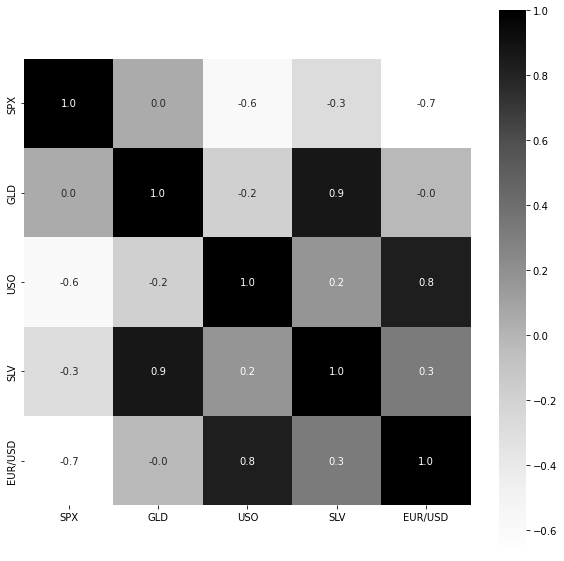

In [8]:
plt.figure(figsize = (10,10))
sns.heatmap(corr1, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':10}, cmap='Greys');


## White (Negative corr) - - - Black (Positive corr)
### If the value are:
* +ve then it is positively correlated ,ex: SLV AND GLD
* -ve then it is negatively correlated ,ex: SPX AND USO

### GOLD CORRELEATION WITH OTHER FEATURES

In [9]:
corr1['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

### Visualizing the Gold distribution

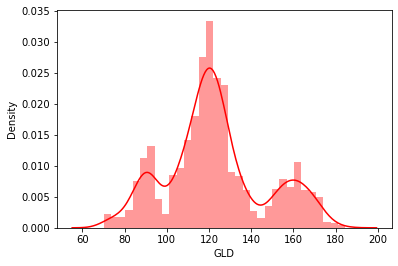

In [10]:
sns.distplot(gold_value['GLD'],color='red');

## ML MODEL PART

### Splitting data into label and features
* Features

In [11]:
x = gold_value.drop(['Date','GLD'],axis=1)

x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


* Label

In [12]:
y = gold_value["GLD"]

y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

### Seperating into test and training data

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 2)

### FIt the model in RandomForestReggression

In [14]:
model = RandomForestRegressor()

### Train the model

In [15]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [16]:
model.score(x_train,y_train)

0.9984001011547617

## Evaluate the model
* Making the model to predict the test data set

In [17]:
gold_prediction = model.predict(x_test)

gold_prediction

array([168.44499927,  82.40449956, 115.85880016, 127.64270107,
       120.68390122, 154.72949815, 150.35649789, 126.1223    ,
       117.44159867, 125.92680101, 116.86990089, 172.19620133,
       141.55119862, 167.84989823, 115.07650034, 117.42710061,
       139.68510378, 169.89460014, 159.31510282, 158.86219988,
       155.21480031, 125.65310013, 175.46839972, 157.22130343,
       125.23020015,  93.65729981,  78.0027001 , 120.69410006,
       119.10959943, 167.38989979,  88.17800018, 125.28469985,
        91.10770083, 117.83909993, 121.12069876, 136.51490025,
       115.51810132, 115.12510078, 147.59859987, 107.2487011 ,
       104.36130242,  87.17309793, 126.44850064, 118.13410025,
       153.10259873, 119.55520006, 108.37279975, 108.03539778,
        93.1463003 , 127.01119816,  75.03590023, 113.80129935,
       121.34050014, 111.27209903, 118.83779896, 120.91129908,
       159.06579994, 168.81130057, 147.04319652,  85.56669853,
        94.46460052,  86.71049897,  90.41970021, 118.98

### Compare the Predicted value and actual value

* R squared error


In [18]:
error_score = metrics.r2_score(y_test,gold_prediction)

print("R squared : ",error_score)

R squared :  0.9887053675551112


#### Gold price are in range of 100s so 0.98 error score is less 
#### Model is working well

* Plot

In [19]:
y_test1 = list(y_test)

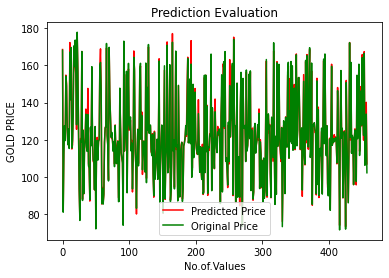

In [20]:
plt.plot(gold_prediction,color="red",label="Predicted Price")
plt.plot(y_test1,color="green",label="Original Price")
plt.title("Prediction Evaluation")
plt.xlabel('No.of.Values')
plt.ylabel('GOLD PRICE')
plt.legend()
plt.show()

#### As it is displayed the deviation of green and red is too low
#### Model is working well

* Accuracy

In [21]:
model.score(x_test,y_test)

0.9887053675551112